In [2]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


# Let's generate a random 2x2 matrix and look at the dynamics of the resulting linear system
$$
\begin{bmatrix}
\dot{x}_1 \\ \dot{x}_2
\end{bmatrix}
=
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}
$$
$$\dot{x} = Ax$$

In [176]:
A = 20*rand(2, 2) - 10
print('A=')
print(A)
L, V = eig(A) ## the function `eig` computes numerical approximation for eigenvalues and eigenvectors
print('eigenvalues=')
print(L)
V = matrix(V) # the eigenvectors v1 and v2 are the columns of the matrix V
def xsol(t, x0): # the solution to the linear system, given a time t and an initial condition x0
    c = V.I*x0 # the constants are determined by the initial condition
    return V*diag(exp(L*t))*c # this is equivalent to c1*v1*exp(lambda1*t) + c2*v2*exp(lambda2*t)

A=
[[-0.25254965  5.21125483]
 [-9.56239721 -8.83856119]]
eigenvalues=
[-4.54555542+5.6037657j -4.54555542-5.6037657j]


# We will pick 10 random inital conditions and plot the trajectories

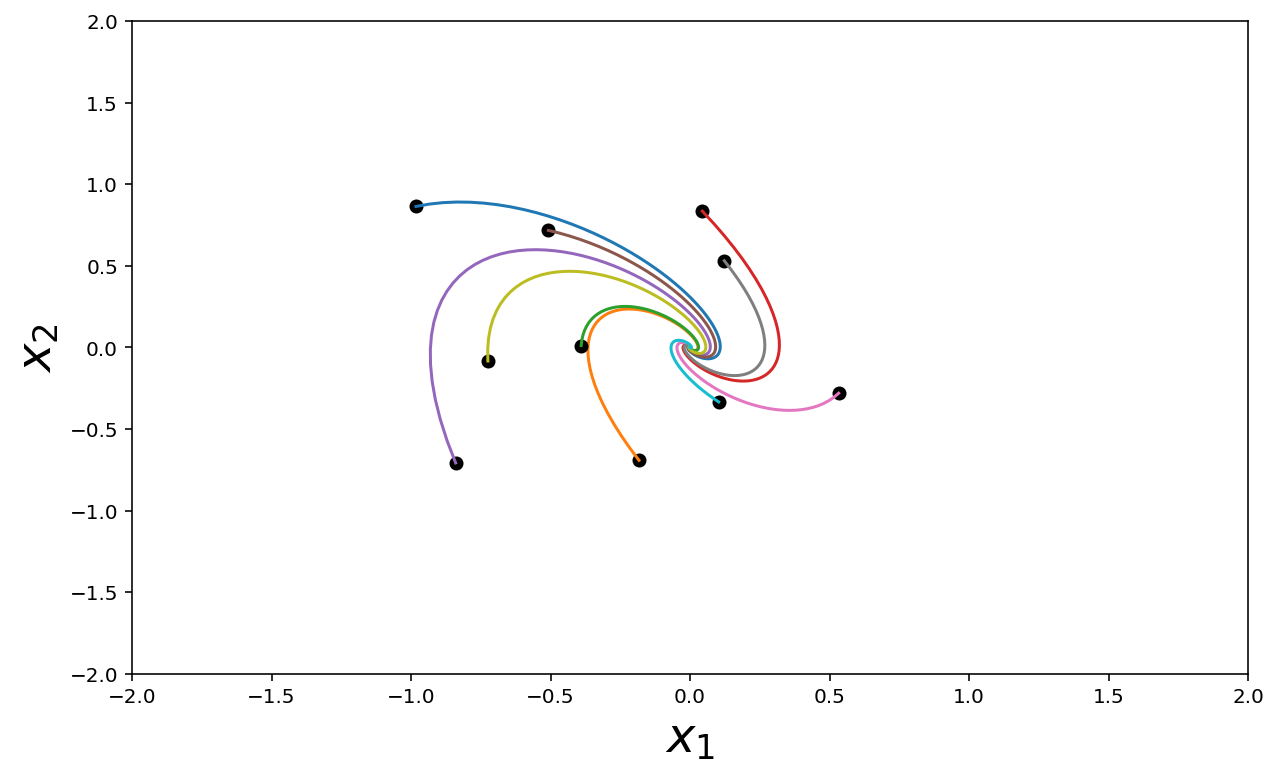

In [177]:
t = linspace(0, 2, 200)
figure(1, [10, 6])
for n in arange(10):
    x0 = matrix(2*rand(2) -1).reshape(2, 1) # pick a random initial condition
    x = array([xsol(tn, x0) for tn in t]) # make the solution
    plot(x0[0], x0[1], 'ok') # plot the inital condition
    plot(x[:, 0], x[:, 1]) # plot the trajectory
xlim(-2, 2)
ylim(-2, 2);
xlabel('$x_1$', fontsize=24)
ylabel('$x_2$', fontsize=24);